In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [28]:
X,y=make_blobs(
    n_samples=1000, # Generate 1000 total data points
    centers=3,     # Create 3 distinct clusters or blobs
    n_features=2   # Each data point has 2 features
)
# X: a 2D NumPy array of shape (1000, 2) — the actual data points.
# y: a 1D array of shape (1000,) — the true cluster labels (0, 1, 2), mostly used for evaluation or plotting.

In [29]:
X

array([[ 4.53151585,  8.47768256],
       [ 2.83503971, 10.67048621],
       [-4.85584605, -7.31732172],
       ...,
       [-7.32383688, -6.83174293],
       [-7.67944952, -2.829951  ],
       [ 3.86001949, 11.21900191]], shape=(1000, 2))

In [30]:
y

array([1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1,
       1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2,
       0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0,
       1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2,
       2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2,
       2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0,
       0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 2,
       0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,

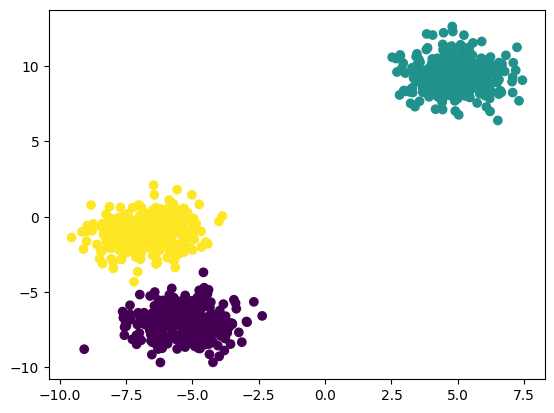

In [31]:
plt.scatter(
    X[:,0], # all row of 1st feature(column)
    X[:,1], # # all row of 2nd feature(column)
    c=y    # Color the points based on their true cluster label
)

In [32]:
## standardization --> feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [35]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [36]:
from sklearn.cluster import KMeans

In [37]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(
        n_clusters=k,
        init="k-means++" # avoid random initialization trap
    )
    kmeans.fit(X_train_scaled) # Trains the model on the scaled data
    wcss.append(kmeans.inertia_) # Gets the WCSS (inertia) for the current K

In [38]:
wcss

[1339.9999999999995,
 121.88192636432885,
 36.633907672498246,
 31.82279597519608,
 26.616734208587104,
 24.560506526179843,
 19.972562034797882,
 18.73455712751821,
 15.5126473265004,
 14.250452268105667]

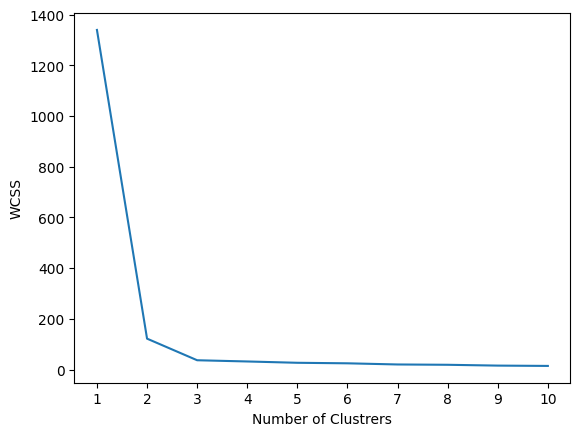

In [39]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [47]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [48]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0,
       0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 1,

In [49]:
y_pred=kmeans.predict(X_test_scaled)

In [50]:
y_pred

array([1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2,
       0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2,
       0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2,

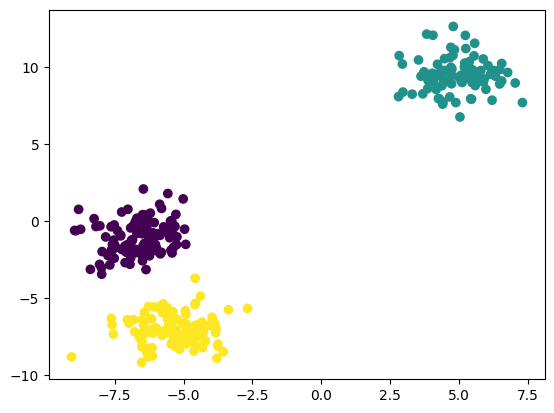

In [51]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

#### Validating the k value :- Two Methods
1. kneelocator
2. Silhoutee scoring

In [52]:
## kneelocator
!pip install kneed

In [53]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(
    range(1,11),
    wcss,
    curve="convex",
    direction="decreasing"
)

In [55]:
kl.elbow

np.int64(2)

In [56]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [57]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [58]:
silhouette_coefficients

[np.float64(0.8244477729617894),
 np.float64(0.751145782291262),
 np.float64(0.6440371475483208),
 np.float64(0.6302191764984652),
 np.float64(0.4382169127807806),
 np.float64(0.34587083652961254),
 np.float64(0.3394147324229596),
 np.float64(0.3376654522470191),
 np.float64(0.3561953308700645)]

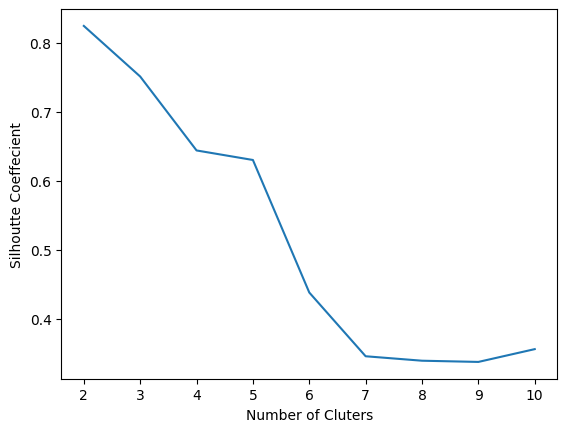

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

# Point at Silhoutte Coeffecient is high, we use it.